tensor([4.6776])

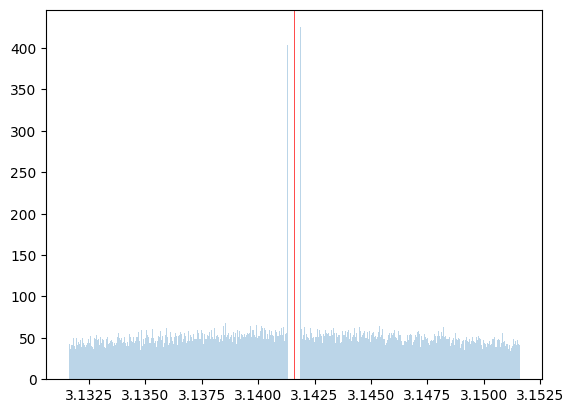

In [1]:
from spherinator.distributions import (
    HypersphericalUniform,
    PowerSpherical,
    MarginalTDistribution,
)
import torch
import math
from matplotlib import pyplot as plt

torch.set_default_dtype(torch.float64)

loc = torch.tensor([-1.0, 0.0])
scale = torch.tensor([1e4])
dist = PowerSpherical(loc, scale)

x = dist.rsample((100000,)).squeeze()
# print(x)
# print(torch.atan2(torch.tensor([-1.0]), torch.tensor([0.0])))

plt.hist(
    (lambda v: torch.where(v > 0, v, 2 * math.pi + v))(torch.atan2(x[:, 1], x[:, 0])),
    # torch.atan2(x[:, 1], x[:, 0]),
    range=(math.pi - 0.01, math.pi + 0.01),
    density=True,
    bins=500,
    alpha=0.3,
    label="samples",
)
plt.axvline(x=math.pi, color="r", linewidth=0.5)
# theta = torch.linspace(math.pi - 0.03, math.pi + 0.03, 1000)
# x = torch.stack([torch.cos(theta), torch.sin(theta)], dim=1)
# probs = torch.exp(dist.log_prob(x))
# plt.plot(theta, probs.detach().numpy())
# plt.show()

# theta = torch.linspace(0, 2 * math.pi, 1000)
# x = torch.stack([torch.cos(theta), torch.sin(theta)], dim=1)

# probs = torch.exp(dist.log_prob(x))
# plt.plot(theta, probs.detach().numpy())
# plt.show()

ref = HypersphericalUniform(2)
torch.distributions.kl.kl_divergence(dist, ref)

torch.Size([100000])


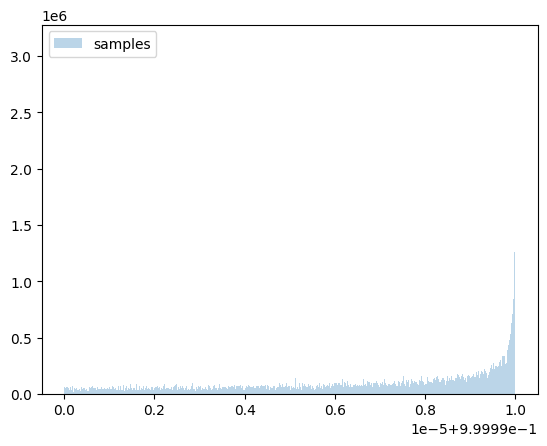

In [2]:
loc = torch.tensor([2])
scale = torch.tensor([1e4])
dist = MarginalTDistribution(loc, scale)

x = dist.sample((int(1e5),)).squeeze()
print(x.shape)
plt.hist(
    x,
    range=(1.0 - 1e-5, 1.0),
    density=True,
    bins=1000,
    alpha=0.3,
    label="samples",
)

plt.legend()
plt.show()

torch.Size([100000])


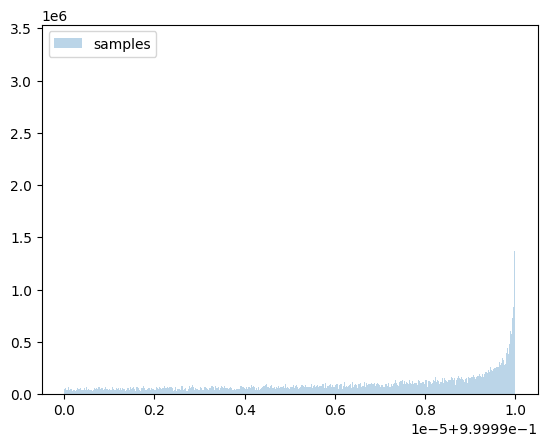

In [3]:
from torch.distributions import Beta

dist = Beta(torch.tensor(1e4 + 0.5), torch.tensor(0.5))

x = dist.sample((int(1e5),)).squeeze()
print(x.shape)
plt.hist(
    x,
    range=(1.0 - 1e-5, 1.0),
    density=True,
    bins=1000,
    alpha=0.3,
    label="samples",
)

plt.legend()
plt.show()